#**Ch04. 분류**

##**01. 분류(Classification)의 개요**
**지도학습** : 레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
- **분류(Classification)** : 학습 데이터로 주어진 데이터의 피처와 레이블 값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것
  - 베이즈 통계와 생성 모델에 기반한 **나이브 베이즈(Naive Bayes)**
  - 독립변수와 종속변수의 선형 관계성에 기반한 **로지스틱 회귀(Logistic Regression)**
  - 데이터 균일도에 따른 규칙 기반의 **결정 트리(Decision Tree)**
  - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 **서포트 벡터 머신(Support Vector Machine)**
  - 근접 거리를 기준으로 하는 **최소 근접(Nearest Neighbor) 알고리즘**
  - 심층 연결 기반의 **신경망(Neural Network)**
  - 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 **앙상블(Ensemble)**




####**앙상블**
- 정형 데이터의 예측 분석 영역에서 높은 예측 성능을 보임
- 매우 많은 여러개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치 업데이트하면서 예측 성능 향상
- 배깅(Bagging)
  - 랜덤 포레스트(Random Forset)
- 부스팅(Boosting)
  - 그래디언트 부스팅(Gradient Boosting) : 뛰어난 예측 성능, 수행 시간이 너무 오래 걸림
  - XgBoost(eXtra Gradient Boost)
  - LightGBM

- 결정 트리
  - 매우 쉽고 유연하게 적용될 수 있는 알고리즘
  - 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
  - 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며 이로 인한 과적합이 발생해 예측 성능 저하될 수 있음
  - 좋은 약한 학습기






##**02. 결정 트리**
**결정 트리(Decision Tree)**: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것
- if/else 기반
- `규칙 노드(Decision Node)` : 규칙 조건
- `리프 노드(Sub Tree)` : 결정된 클래스 값
- `브랜치/ 서브 트리` : 새로운 규칙 조건마다 규칙 노드 기반의 서브 트리 생성

트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다 
- 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
- 어떻게 트리를 분할(split)할 것인가가 중요함

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.

1. 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만든다.
2. 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복한다.

**정보 균일도를 측정하는 방법** : 엔트로피를 이용한 정보 이들(Information Gain) 지수, 지니 계수
- `정보 이득 지수` : 1- 엔트로피 지수
- `지니 지수` : 지니계수가 낮을수록 데이터 균일도가 높다. (경제학에서 불평등 지수)

DecisionTreeClassifier : 기본적으로 지니계수를 이용해 데이터 세트를 분할






####**결정 트리 모델의 특징**
정보의 '균일도'라는 룰을 기반으로 함, 알고리즘이 쉽고 직관적이다.

|결정 트리 장점|결정 트리 단점|
|---|---|
|쉽다,직관적이다|과적합으로 알고리즘 성능이 떨어진다.|
|피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음|이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요|



####**결정 트리 파라미터**
- **DecisionTreeClassifier** : 분류를 위한 클래스
- **DecisionTreeRegressor** : 회귀를 위한 클래스
- CART(Classifiacion And Regression Trees) 기반: 분류뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘
- 파라미터
  - `min_samples_split`
    - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨
    - 디폴트는 2이고, 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
    - 과적합을 제어, 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가

  - `min_samples_leaf`
    - 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
    - min_samples_split와 유사하게 과적합 제어 용도, 그러나 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우에는 작게 설정 필요
  - `max_features` 
    - 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트 None 으로 데이터 세트의 모든 피처를 사용해 분할 수행
    - int 형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임
    - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수)
    - 'auto' 로 지정하면 sqrt와 동일
    - 'log' 는 전체 피처 중 log2(전체 피처 개수) 선정
    - 'None' 은 전체 피처 선정
  - `max_depth`
    - 트리의 최대 깊이를 규정
    - 디폴트는 none, None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때가지 계속 깊이를 증가시킴
    - 깊이가 깊어지면 min_samples_split 설정대호 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요

  - `max_leaf_nodes` : 말단 노드(leaf)의 최대 개수

####**결정 트리 모델의 시각화**
`Graphviz `: 원래 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지
`export_graphviz()` : 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줌

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTreeClassirier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split (iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

In [3]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

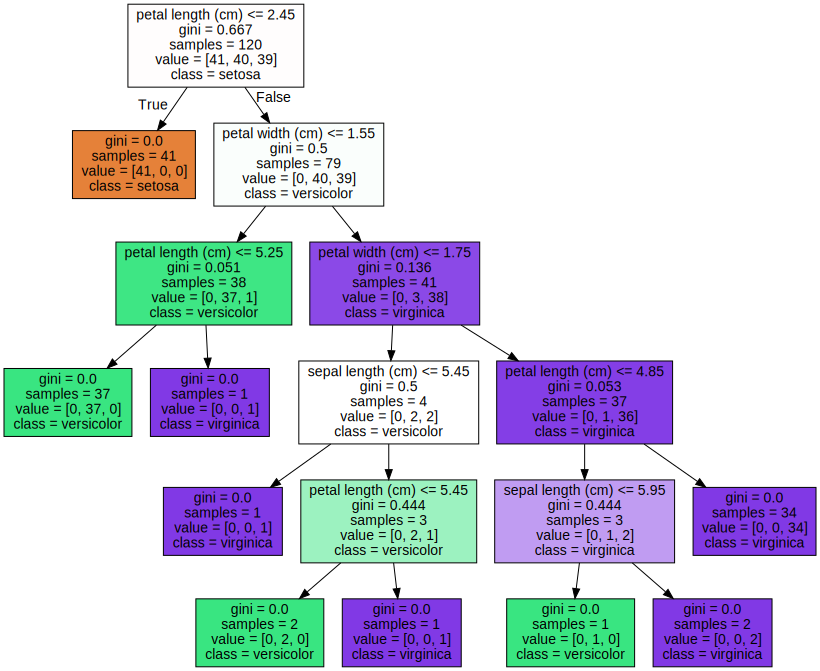

In [4]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph=f.read()

graphviz.Source(dot_graph)

- petal legth(cm) <=2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건, 이 조건이 없으면 리프 노드

- gini : 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
- samples : 현 규칙에 해당하는 데이터 건수
- value=[] : 클래스 값 기반의 데이터 건수
  - 0: Setosa, 1: Verisicolor, 2: Virginica
- 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미
  - 주황색 : 0, Setosa, 초록색 : 1, Versicolor, 보라색 : 2, Virginica
  - 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다

**루트 노드(1번 노드)**
- samples=120 : 전체 데이터가 120개
- value=[41,40,39] : Setosa 41개, Versicolor 40개, Virginica 39개
- sample 120개가 value=[41,40,39] 분포도로 되어 있으므로 지니 계수는 0.667
- petal length(cm) <=2.45 규칙으로 자식 노드 생성
- class=setosa는 하위 노드를 가질 경우에 setosa의 개수가 41개로 제일 많다는 의미

**2번 노드**
- 모든 데이터가 Setosa로 결정되므로 클래스가 결정된 리프 노드가 되고 더 이상 2번 노드에서 규칙을 만들 필요가 없다.
- petal length(cm) <=2.45가 True인 규칙으로 생성되는 리프 노드
- 지니 계수는 0

**3번 노드**
- petal length(cm) <=2.45가 False인 규칙 노드
- 79개의 샘플 데이터 중 Vesicolor 40개, Virginica 39개로 여전히 지니 계수는 0.5로 높다.
- petal width(cm) <=1.55 규칙으로 자식 노드 생성

**4번 노드**
- Petal width(cm) <=1.55가 True 인 규칙 노드
- 38개의 샘플 데이터 중 Versicolor 37개, Virginica가 1개로 대부분이 Versicolor
- 지니 계수는 0.051로 매우 낮으나 여전히 Versicolor와 Virginica가 혼재돼 있으므로 petal length(cm)<=5.25라는 새로운 규칙으로 다시 자식 노드 생성

**5번 노드**
- Petal width(cm) <=1.55가 False인 규칙 노드
- 41개의 샘플 데이터 중 Versicolor 3개, Virginica 가 38개로 대부분이 verginica
- 지니 계수는 0.136으로 낮으나 여전히 Versicolor 와 Versinica가 혼재되어 있으므로 petal width(cm)<=1.75라는 새로운 규칙으로 다시 자식 노드 생성

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


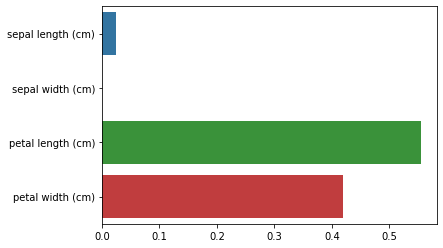

In [5]:
#결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표

import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name,value))

#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

####**결정 트리 과적합(Overfitting)**
- `make_classification()` : 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 하는 함수

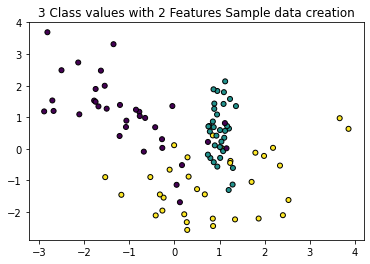

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

#각 피처가 X, Y축으로 나열된 2차원 그래프이며, 3개의 클래스 값 구분은 색깔로 되어 있다.

X_features, y_labels 데이터 세트를 기반으로 결정트리 학습

In [7]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

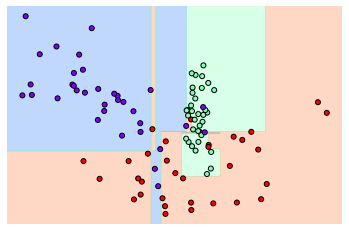

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

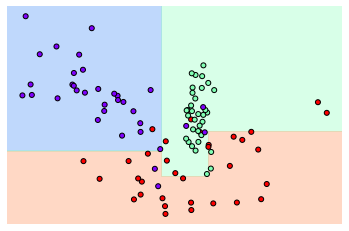

In [9]:
#min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

####**결정 트리 실습 - 사용자 행동 인식 데이터 세트**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/22-2/DATA/human_activity/features.txt',sep='\s+',header=None,names=['column_index','column_name'])

##**03. 앙상블 학습**

####**앙상블 학습 개요**
앙상블 학습(Ensemble Learning) : 여러개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 보팅, 배깅, 부스팅
- 스태깅 등
- 보팅, 배깅 : 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
  - 보팅 : 서로 다른 알고리즘을 가진 분류기를 결합
  - 배깅 : 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 하는 것
 ex) 랜덤 포레스트
    - 부트스트래핑 방식 : 개별 Classifier 에게 데이터를 샘플링해서 추출하는 방식
    - 개별 분류기가 부트스트래핑으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해 최종 예측 결과를 선정하는 방식
- 부스팅 : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행하는 것
  - 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)
- 스태킹 : 여러가지 모델의 예측 결괏값을 다시 학습데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법





####**보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**
- **하드 보팅** : 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
- **소프트 보팅**: 분류기들의 레이블 값 결정 확률을 모두 더하고 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

####**보팅 분류기(Voting Classifier)**
보팅 방식의 앙상블을 이용한 위스콘신 유방암 데이터 세트 분석
- 유방암의 악성종양, 악성종양 여부를 결정하는 이진 분류 데이터 세트

In [11]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer= load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns= cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [12]:
#로지스틱 회귀, KNN 기반 소프트 보팅 분류기

#개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size= 0.2, random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도:0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


##**04.랜덤 포레스트**


####**랜덤 포레스트의 개요 및 실습**
**배깅** : 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘
- **랜덤 포레스트** : 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨
  - 앙상블 알고리즘 중 비교적 빠른 수행속도
  - 다양한 영역에서 높은 예측 성능
- 부트 스트래핑(bootstrapping) :  여러 개의 데이터 세트를 중첩되게 분리하는 것



In [13]:
import pandas as pd

# ValueError: Duplicate names are not allowed
# 위 오류를 수정하기 위한 코드
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

# 사용자 행동 데이터셋에 DataFrame을 반환하는 함수
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/22-2/DATA/human_activity/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('/content/drive/MyDrive/ESAA/22-2/DATA/human_activity/train/X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('/content/drive/MyDrive/ESAA/22-2/DATA/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('/content/drive/MyDrive/ESAA/22-2/DATA/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    My_y_test = pd.read_csv('/content/drive/MyDrive/ESAA/22-2/DATA/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return My_X_train, My_X_test, My_y_train, My_y_test

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


####**랜덤 포레스트 하이퍼 파라미터 및 튜닝**
- n_estimators : 랜덤 포레스트에서 결정 트리의 개수 지정
  - 디폴트는 10개
  - 많아질수록 좋은 성능을 기대할 수 있지만 학습 수행 시간이 오래 걸림
- max_features : 결정 트리에 사용된 max_features 파라미터와 같음
  - 기본값은 'None'이 아니라 'auto', 즉 'sqrt'와 같음
  - 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수)만큼 참조, 
  - max_depth나 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에서도 똑같이 적용될 수 있음

In [26]:
# #랜덤 포레스트의 하이퍼 파라미터 튜닝
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators' : [100],
#     'max_depth' : [6,8,10,12],
#     'min_samples_leaf' : [8,12,18],
#     'min_samples_split' : [8,16,20]
# }

# #RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
# grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
# grid_cv.fit(X_train, y_train)

# print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
# print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

n_estimators가 100, max_depth : 10, min_samples_leaf:8, min_samples_split:8일 때 평균 정확도 91.68%

In [19]:
#n_estimators ->300
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9165


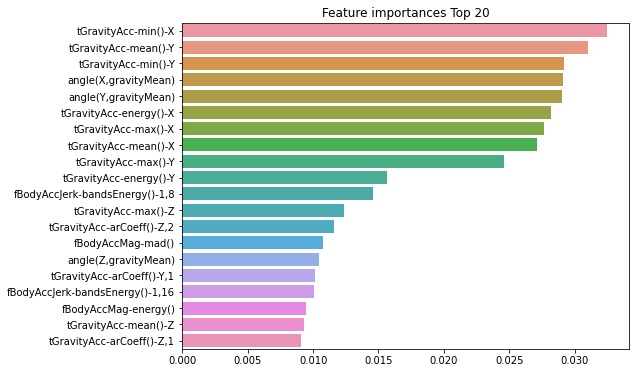

In [21]:
#피처 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

##**05. GBM(Gradient Boosting Machine)**


####**GBM의 개요 및 실습**
부스팅 알고리즘 : 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- AdaBoost(Adaptive boosting), 그래디언트 부스트
- **에이다 부스트(AdaBoost)** : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘 
> 1. 첫 번째 약한 학습기가 분류기준 1로 +, - 분류
> 2. 오류 데이터에 대해 가중치 값을 부여
> 3. 두 번째 약한 학습기가 분류기준 2로 +와 - 분류
> 4. 잘못 분류된 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중치 부여
> 5. 세 번째 약한 학습기가 분류 기준 3으로 +와 -를 분류하고 오류 데이터를 찾음
> 약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측을 수행

- **GBM(Gradient Boost Machine)** : 가중치 업데이트를 경사 하강법(Gradient Descent)를 이용함
  - 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법
  -  오류식 `h(x) = y - F(x)`를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 ( y : 분류의 실제 결과값, F(x) : 피처 x에 기반한 예측함수 )


In [25]:
# from sklearn.ensemble import GradientBoostingClassifier
# import time
# import warnings
# warnings.filterwarnings('ignore')

# X_train, X_test, y_train, y_test = get_human_dataset()

# #GBM 수행 시간 측정을 위함. 시작 시간 설정
# start_time = time.time()

# gb_clf = GradientBoostingClassifier(random_state=0)
# gb_clf.fit(X_train,y_train)
# gb_pred = gb_clf.predict(X_test)
# gb_accuracy = accuracy_score(y_test, gb_pred)

# print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
# print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

####**GBM 하이퍼 파라미터 및 튜닝**
- loss : 경사 하강법에서 사용할 비용 함수를 지정. 특별한 이유가 없으면 기본값 'deviance'를 그대로 적용
- learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률, weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수
  - 0~1사이의 값을 지정할 수 있으며 기본값은 0.1
- n_estimators : weak learner의 개수, weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있으나 많을수록 수행 시간이 오래 걸림, 기본 값 = 100
- subsample : weak learner가 학습에 사용되는 데이터의 샘플링 비율, 기본값 = 1(전체 학습데이터를 기반으로 학습)
  - 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

위의 설정을 그대로 테스트 데이터 세트에 적용하여 예측 정확도 확인

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

예측 성능이 뛰어나지만 수행 시간이 오래걸린다는 단점